# Imports etc.

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
import string
gg.theme_set(gg.theme_classic)

# Directories

In [2]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Figures

## Stochastic versus deterministic

In [3]:
det_dat = pd.DataFrame({
    'Accuracy': ['Corr.', 'Incorr.'],
    'p(reward)': [1, 0]
})
det_dat

,Accuracy,p(reward)
0,Corr.,1
1,Incorr.,0


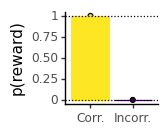

<ggplot: (141305494369)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 1.2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualDeterministic.png


In [4]:
gg.options.figure_size = (1.2, 1.2)
g = (gg.ggplot(det_dat, gg.aes('Accuracy', 'p(reward)', color='p(reward)', fill='p(reward)'))
     + gg.geom_point(color='black')
     + gg.geom_bar(stat='identity')
     + gg.geom_hline(yintercept=[0, 1], linetype='dotted')
     + gg.labs(x='')
     + gg.theme(legend_position='none')
     + gg.coord_cartesian(ylim=(0, 1))
    )
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualDeterministic.png'))

In [5]:
stoch_dat = pd.DataFrame({
    'Accuracy': ['Corr.', 'Incorr.'],
    'p(reward)': [0.8, 0.2]
})
stoch_dat

,Accuracy,p(reward)
0,Corr.,0.8
1,Incorr.,0.2


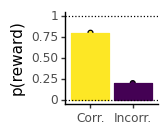

<ggplot: (141305494369)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 1.2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualStochasticBF.png


In [6]:
g.data = stoch_dat
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualStochasticBF.png'))

In [7]:
stoch_dat = pd.DataFrame({
    'Accuracy': ['Corr.', 'Incorr.'],
    'p(reward)': [0.75, 0]
})
stoch_dat

,Accuracy,p(reward)
0,Corr.,0.75
1,Incorr.,0.00


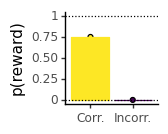

<ggplot: (141305494369)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 1.2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualStochasticPS.png


In [8]:
g.data = stoch_dat
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualStochasticPS.png'))

## Contextual versus non-contextual

In [19]:
def get_cont_dat(n_stimuli, n_responses, n_trials):
    
    cont_dat = pd.DataFrame({
        'Trial': np.arange(n_trials),
    })
    for stim in string.ascii_uppercase[:n_stimuli]:
        cont_dat[stim] = np.random.choice(list(string.ascii_uppercase[n_stimuli:n_stimuli+n_responses]))

    cont_dat = pd.melt(cont_dat, id_vars='Trial', var_name='Stimulus', value_name='CorrectResponse')
        
    return cont_dat
    
n_trials = 60
cont_dat = get_cont_dat(n_stimuli=5, n_responses=3, n_trials=n_trials)
cont_dat

,Trial,Stimulus,CorrectResponse
0,0,A,F
1,1,A,F
2,2,A,F
3,3,A,F
4,4,A,F
...,...,...,...
295,55,E,F
296,56,E,F
297,57,E,F
298,58,E,F


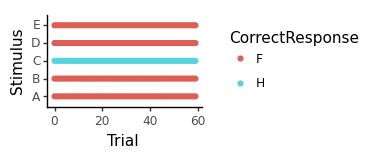

<ggplot: (141307394145)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualContextualRLWM.png


In [20]:
gg.options.figure_size = (2, 1.2)
g = (gg.ggplot(cont_dat, gg.aes('Trial', 'Stimulus'))
     + gg.geom_point(gg.aes(color='CorrectResponse'))
    )
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualContextualRLWM.png'))

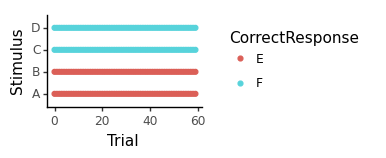

<ggplot: (141307394145)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualContextualBF.png


In [21]:
g.data = get_cont_dat(n_stimuli=4, n_responses=2, n_trials=n_trials)
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualContextualBF.png'))

In [22]:
block_lengths = [15, 8, 10, 18, 12]
context_order = np.tile(['A', 'B'], 3)
corrects = np.array([])
for l, c in zip(block_lengths, context_order):
    corrects = np.append(corrects, np.repeat([c], l))
corrects = corrects[:n_trials]

noncont_dat = pd.DataFrame({
    'Trial': np.arange(n_trials),
    'CorrectResponse': corrects,
    'Stimulus': np.repeat(['None'], n_trials)
})
noncont_dat

,Trial,CorrectResponse,Stimulus
0,0,A,None
1,1,A,None
2,2,A,None
3,3,A,None
4,4,A,None
5,5,A,None
6,6,A,None
7,7,A,None
8,8,A,None
9,9,A,None


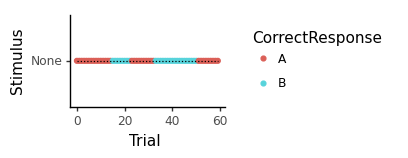

<ggplot: (141306216220)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualNoncontextualPS.png


In [23]:
g = g + gg.geom_line(group=1, linetype='dotted')
g.data = noncont_dat
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualNoncontextualPS.png'))

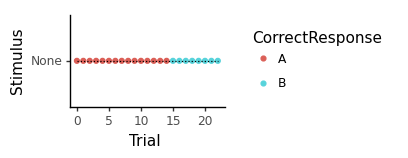

<ggplot: (141306216220)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 1.2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\9_ConceptualNoncontextualFC.png


In [24]:
g.data = noncont_dat.loc[noncont_dat['Trial'] < 23]
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualNoncontextualFC.png'))

## Contextual versus non-contextual

In [ ]:
n_trials = 60
n_contexts = 2

contexts = np.random.permutation(np.repeat(list(string.ascii_uppercase[n_contexts:2*n_contexts]), int(n_trials / n_contexts)))
cont_dat = pd.DataFrame({
    'Trial': np.arange(n_trials),
    'Context': contexts,
})
cont_dat['Correct'] = cont_dat['Context'].replace(
    {string.ascii_uppercase[i+n_contexts]: string.ascii_uppercase[i] for i in range(n_contexts)})
cont_dat

In [ ]:
gg.options.figure_size = (2.5, 1.5)
g = (gg.ggplot(cont_dat, gg.aes('Trial', 'Correct', group=1))
     + gg.geom_point(gg.aes(color='Context'))
     + gg.geom_line(linetype='dotted')
    )
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualContextual_.png'))

In [ ]:
block_lengths = [15, 8, 10, 18, 12]
context_order = np.tile(['A', 'B'], 3)
corrects = np.array([])
for l, c in zip(block_lengths, context_order):
    corrects = np.append(corrects, np.repeat([c], l))
corrects = corrects[:n_trials]

noncont_dat = pd.DataFrame({
    'Trial': np.arange(n_trials),
    'Correct': corrects,
    'Context': np.repeat(['C'], n_trials)
})
noncont_dat

In [ ]:
g.data = noncont_dat
print(g)
g.save(os.path.join(plot_save_path, '9_ConceptualNoncontextual_.png'))

## One for each task

In [ ]:
n_trials = 60

rlwm_dat = pd.DataFrame({
    'Trial': np.arange(n_trials),
    'Correct': np.repeat([1], n_trials),
    'Incorrect': np.repeat([0], n_trials),
})
rlwm_dat = rlwm_dat.melt(id_vars=['Trial'], var_name='Accuracy', value_name='p(reward)')
rlwm_dat

In [ ]:
g_rlwm = (gg.ggplot(rlwm_dat, gg.aes('Trial', 'p(reward)', color='Accuracy'))
#           + gg.geom_hline(yintercept=[0, 1], linetype='dotted')
          + gg.geom_line()
          + gg.coord_cartesian(ylim=(0, 1))
    )
g_rlwm

In [ ]:
bf_dat = rlwm_dat.replace({0: 0.2, 1: 0.8})
bf_dat

In [ ]:
g_bf = g_rlwm
g_bf.data = bf_dat
g_bf

In [ ]:
ps_dat = pd.DataFrame({
    'Trial': np.arange(n_trials),
    ''
})